In [1]:
import urllib2
from bs4 import BeautifulSoup
import dill as pickle
import sys
sys.setrecursionlimit(100000)

In [2]:
#website = "nips2017"
website = "icml2017"

In [3]:
if True:
    if website=='nips2017':
        url = "https://nips.cc/Conferences/2017/AcceptedPapersInitial"
    elif website=='icml2017':
        url = "https://2017.icml.cc/Conferences/2017/AcceptedPapers"
    html = urllib2.urlopen(url)
    soup = BeautifulSoup(html)
    with open(website+'.pickle', mode='wb') as f:
        pickle.dump(soup, f)
else:
    with open(website+'.pickle', mode='rb') as f:
        soup = pickle.load(f)

/home/ruho/anaconda2/envs/python2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /home/ruho/anaconda2/envs/python2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
if website=='nips2017':
    titles = soup.find_all('b')
elif website=='icml2017':
    titles = soup.find_all('strong')
nb_tot_papers = len(titles)
titles

[<strong>Relative Fisher Information and Natural Gradient for Learning Large Modular Models</strong>,
 <strong>Priv\u2019IT: Private and Sample Efficient Identity Testing</strong>,
 <strong>Being Robust (in High-Dimensions) Can Be Practical</strong>,
 <strong>Unifying task specification in reinforcement learning</strong>,
 <strong>Fractional Langevin Monte Carlo: Exploring Levy Driven Stochastic Differential Equations for MCMC</strong>,
 <strong>Lost Relatives of the Gumbel Trick</strong>,
 <strong>Learning the Structure of Generative Models without Labeled Data</strong>,
 <strong>Deep Tensor Convolution on Multicores</strong>,
 <strong>Beyond Filters: Compact Feature Map for Portable Deep Model</strong>,
 <strong>Tight Bounds for Approximate Carath\xe9odory and Beyond</strong>,
 <strong>Fast k-Nearest Neighbour Search via Prioritized DCI</strong>,
 <strong>An Adaptive Test of Independence with Analytic Kernel Embeddings</strong>,
 <strong>Deep Transfer Learning with Joint Adaptation N

In [5]:
print(nb_tot_papers)

434


In [6]:
import re
pattern = r'\([\w\s]+\)'
if website=='nips2017':
    authors = soup.find_all('i')
elif website=='icml2017':
    authors = soup.find_all('em')
institutes = []
institutes_in_paper = []
for author in authors:
    for content in author.contents:
        items = re.findall(pattern, content)
        [institutes.append(item[1:-1].lower()) for item in items]
        institutes_in_paper.append(items)
#institutes = set(sum(institutes, []))
#institutes = set(institutes)
institutes.sort()
institutes

[u'aalborg university',
 u'academia sinica',
 u'academia sinica',
 u'adobe',
 u'adobe',
 u'adobe',
 u'adobe',
 u'adobe research',
 u'adobe research',
 u'adobe research',
 u'adobe research',
 u'adobe research',
 u'adobe research',
 u'aist',
 u'alan turing institute',
 u'alan turing institute',
 u'amazon',
 u'amazon',
 u'amazon',
 u'amazon',
 u'amazon',
 u'amazon',
 u'amazon',
 u'amazon dev center germany',
 u'ant financial',
 u'athens university of economics and business',
 u'atr',
 u'australian national university',
 u'australian national university',
 u'australian national university and data61',
 u'baidu',
 u'baidu',
 u'baidu ai lab',
 u'baidu research',
 u'baidu research',
 u'baidu research',
 u'baidu research',
 u'baidu research',
 u'baidu research',
 u'baidu research',
 u'baidu research silicon valley ai lab',
 u'baidu silicon valley ai lab',
 u'baidu silicon valley ai lab',
 u'baidu svail',
 u'bar ilan university',
 u'berkeley',
 u'berkeley',
 u'berkeley',
 u'berkeley',
 u'berkel

In [7]:
print(nb_tot_papers)

434


In [8]:
from collections import Counter
counter = Counter(institutes)
for word, cnt in counter.most_common():
    print word, cnt

deepmind 64
microsoft research 53
carnegie mellon university 49
mit 43
google 32
google brain 29
uc berkeley 28
stanford university 28
princeton university 22
university of cambridge 22
google deepmind 20
eth zurich 19
epfl 18
duke university 17
georgia tech 17
university of michigan 17
cmu 16
university of texas at austin 16
university of oxford 15
columbia university 14
none 14
stanford 14
georgia institute of technology 13
microsoft 13
facebook 13
university of minnesota 11
peking university 11
google research 11
cornell university 11
university of virginia 10
technion 10
tsinghua university 9
ut austin 9
facebook ai research 9
harvard university 8
weizmann institute of science 8
ibm 8
baidu research 7
university of pennsylvania 7
amazon 7
ucsd 7
new york university 7
kaist 7
university of washington 7
brown university 6
deakin university 6
adobe research 6
northeastern university 6
ucla 6
the chinese university of hong kong 6
massachusetts institute of technology 6
university of ce

In [9]:
def count_paper(institute_names, institutes_in_paper):
    nb_papers = {}
    [nb_papers.update({key:0}) for key, value in institute_names.items()]

    for key, value in institute_names.items():
        for paper in institutes_in_paper:
            try:
                for institute in paper:
                    found = False
                    for v in value:
                        found = found or re.search(v, institute.lower()) 
#                        found = found or v in institute.lower()
                    if found:
                        nb_papers[key] += 1
                        raise Exception
            except Exception:
                pass
    return sorted(nb_papers.items(), key=lambda x: x[1], reverse=True)

In [10]:
institute_names = {}
[institute_names.update({word:[word]}) for word, cnt in counter.most_common()]

#institute_names[u'carnegie mellon university'] += institute_names[u'cmu']
#institute_names[u'adobe research'] += institute_names[u'adobe research']
#del institute_names[u'cmu']
#del institute_names[u'adobe research']
#institute_names

count_paper(institute_names, institutes_in_paper)

[(u'google', 44),
 (u'microsoft', 34),
 (u'microsoft research', 30),
 (u'carnegie mellon university', 25),
 (u'deepmind', 22),
 (u'stanford', 21),
 (u'mit', 20),
 (u'berkeley', 18),
 (u'google brain', 17),
 (u'uc berkeley', 17),
 (u'princeton', 16),
 (u'princeton university', 15),
 (u'stanford university', 15),
 (u'none', 14),
 (u'cmu', 12),
 (u'university of cambridge', 12),
 (u'cambridge', 12),
 (u'university of texas at austin', 11),
 (u'oxford', 11),
 (u'georgia tech', 11),
 (u'google deepmind', 11),
 (u'duke university', 10),
 (u'duke', 10),
 (u'university of oxford', 9),
 (u'google research', 9),
 (u'harvard', 9),
 (u'epfl', 9),
 (u'eth', 9),
 (u'eth zurich', 9),
 (u'facebook', 9),
 (u'university of michigan', 8),
 (u'georgia institute of technology', 8),
 (u'georgia institute of technolog', 8),
 (u'ut austin', 8),
 (u'peking university', 7),
 (u'ucl', 7),
 (u'university of california', 7),
 (u'harvard university', 6),
 (u'university of minnesota', 6),
 (u'university of hong kong

In [11]:
institute_names = {
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind", "google deepmind"],
    "MIT":["mit", "massachusetts institute of technology"],
    "Microsoft":["microsoft research"],
    "Stanford":["stanford university"],
    "UC Berkeley":["uc berkeley"],
    "Oxford":['oxford'],
}

nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 51),
 ('Carnegie Mellon University', 32),
 ('Microsoft', 30),
 ('MIT', 23),
 ('UC Berkeley', 17),
 ('Stanford', 15),
 ('Oxford', 11)]

In [12]:
institute_names = {
    "JPN":['tokyo','waseda','hokkaido','osaka','nankai','nec coorporation','ntt','riken'],
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind", "google deepmind"],
    "Stanford":["stanford university"],
    "MIT":["mit", "massachusetts institute of technology"],
    "UC Berkeley":["uc berkeley"],
    "Microsoft":["microsoft research"],
    "Duke University":["duke"],
    "Oxford":['oxford'],
    "Princeton University":['princeton'],
    "ETH Zurich":['eth', 'zurich'],
    "University of Michigan":['michigan'],
    "Columbia Michigan":['columbia'],
    "University of Cambridge":['cambridge'],
    "Harvard University":['harvard'],
    "EPFL":['epfl'],
    "INRIA":['inria'],
    "Georgia Tech":['georgia'],
    "Tsinghua University":['tsinghua'],
    "UCL":['ucl'],
    "University of Toronto":['toronto'],
    "facebook":['facebook'],
    "UIUC":['uiuc'],
    "University of Texas":['texas'],
    "University of Minnesota":['minnesota'],
    "Peking University":['peking'],
}
nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 51),
 ('Carnegie Mellon University', 32),
 ('Microsoft', 30),
 ('MIT', 23),
 ('UC Berkeley', 17),
 ('Princeton University', 16),
 ('Stanford', 15),
 ('Georgia Tech', 13),
 ('University of Cambridge', 12),
 ('University of Texas', 11),
 ('Oxford', 11),
 ('Duke University', 10),
 ('ETH Zurich', 9),
 ('facebook', 9),
 ('Harvard University', 9),
 ('EPFL', 9),
 ('University of Michigan', 8),
 ('Columbia Michigan', 8),
 ('JPN', 7),
 ('Peking University', 7),
 ('UCL', 7),
 ('University of Minnesota', 6),
 ('INRIA', 5),
 ('Tsinghua University', 4),
 ('UIUC', 4),
 ('University of Toronto', 2)]

In [13]:
import numpy as np
nb_papers.append(('rest',nb_tot_papers-np.array([i[1] for i in nb_papers]).sum()))

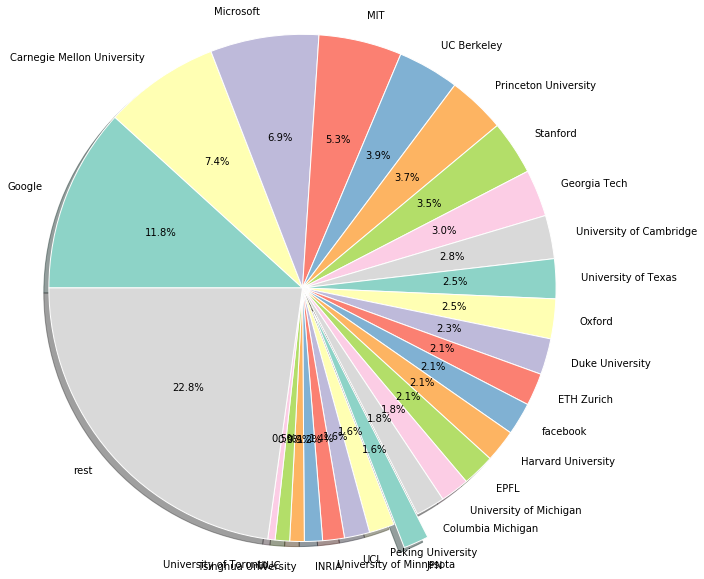

In [14]:
import matplotlib.pyplot as plt
import seaborn
from matplotlib import cm
cs=cm.Set3(np.arange(9))

plt.figure(figsize=(10,10))
 
# Data to plot
labels = [i[0] for i in nb_papers]
sizes = [i[1] for i in nb_papers]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0]*len(nb_papers)
for i,x in enumerate(nb_papers):
    if x[0]=='Google' or x[0]=='Google' or x[0]=='Carnegie Mellon University' or x[0]=='MIT' or x[0]=='Microsoft' or x[0]=='Stanford' or x[0]=='UCBerkeley':
        explode[i]=0.
    if x[0]=='JPN':
        explode[i]=0.1
 
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=cs,
    startangle=180,
    counterclock=False, 
    wedgeprops={'linewidth': 1, 'edgecolor':"white"},
    autopct='%1.1f%%',
    shadow=True
)

plt.axis('equal')
#plt.title('NIPS 2017 paper')
plt.savefig(website+'.png')
plt.show()

In [15]:
institute_names = {
    "UCLA":['ucla'],
    "IBM":['ibm'],
    "Adobe":['adobe'],
    "Intel":['intel'],
    "Nvidia":['nvidia'],
    "OpenAI":['openai'],
    "Amazon":['amazon'],
    "Max Planck Institute":['planck'],
    "NTT":['ntt'],
    "NEC":['nec'],
    "TTIC":['toyota technological institute at chicago'],
    "Uber":['uber'],
    "Riken":['riken'],
    "Twitter":['twitter'],
    "JPN University":['tokyo','waseda','hokkaido','osaka','nankai'],
}

count_paper(institute_names, institutes_in_paper)

[('IBM', 6),
 ('Amazon', 6),
 ('JPN University', 6),
 ('Adobe', 5),
 ('UCLA', 3),
 ('TTIC', 2),
 ('OpenAI', 2),
 ('Uber', 1),
 ('NEC', 1),
 ('NTT', 1),
 ('Max Planck Institute', 1),
 ('Riken', 1),
 ('Twitter', 0),
 ('Nvidia', 0),
 ('Intel', 0)]